In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/pranav/Desktop/Database/Crime_Data_from_2020_to_Present.csv')  # Replace with your actual file path
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'DATE OCC' column to a datetime object, including the time
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')


In [27]:
# Extract the day of the week and create a new column
df['Day of Week'] = df['DATE OCC'].dt.day_name()
# Extract the year from the 'DATE OCC' column
filtered_data['Year'] = filtered_data['DATE OCC'].dt.year
# Group the data by year and day of the week and calculate the crime count
crime_by_year_and_day = filtered_data.groupby(['Year', 'Day of Week'])['DR_NO'].count().reset_index()
print(crime_by_year_and_day)

    Year Day of Week  DR_NO
0   2020      Friday  29888
1   2020      Monday  28262
2   2020    Saturday  28908
3   2020      Sunday  27605
4   2020    Thursday  28230
5   2020     Tuesday  27575
6   2020   Wednesday  28949
7   2021      Friday  32258
8   2021      Monday  30273
9   2021    Saturday  30247
10  2021      Sunday  29346
11  2021    Thursday  29358
12  2021     Tuesday  28497
13  2021   Wednesday  29388
14  2022      Friday  36098
15  2022      Monday  32405
16  2022    Saturday  35164
17  2022      Sunday  32261
18  2022    Thursday  33095
19  2022     Tuesday  32222
20  2022   Wednesday  33019
21  2023      Friday  27634
22  2023      Monday  25954
23  2023    Saturday  26296
24  2023      Sunday  25904
25  2023    Thursday  25753
26  2023     Tuesday  24853
27  2023   Wednesday  25770


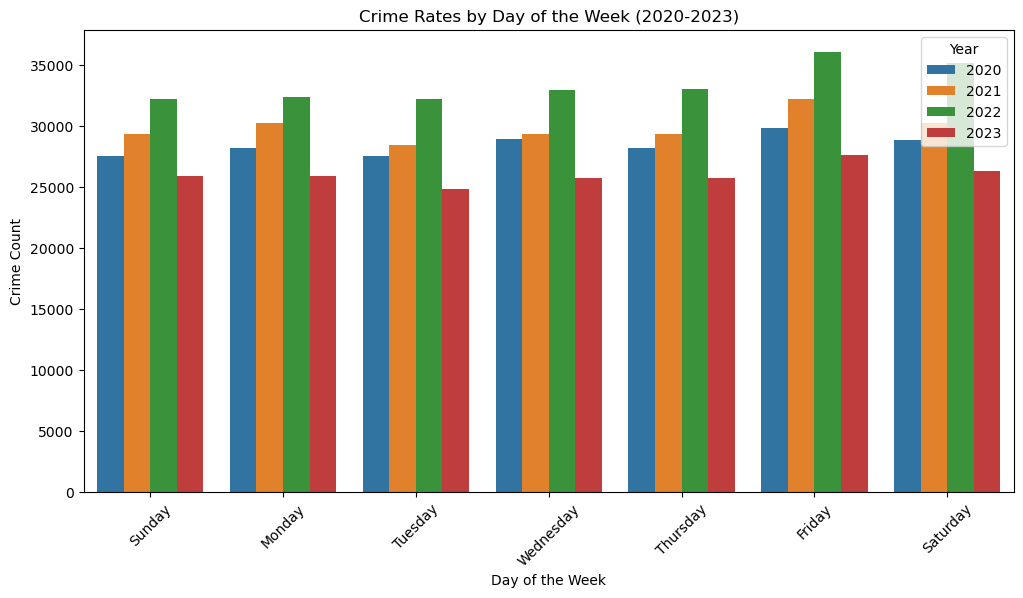

In [25]:
# Set the order of days of the week for plotting
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a bar plot for each year
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='DR_NO', data=crime_by_year_and_day, order=day_order, hue='Year')
plt.title('Crime Rates by Day of the Week (2020-2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

  Day of Week   DR_NO
0      Friday  125878
1      Monday  116894
2    Saturday  120615
3      Sunday  115116
4    Thursday  116436
5     Tuesday  113147
6   Wednesday  117126


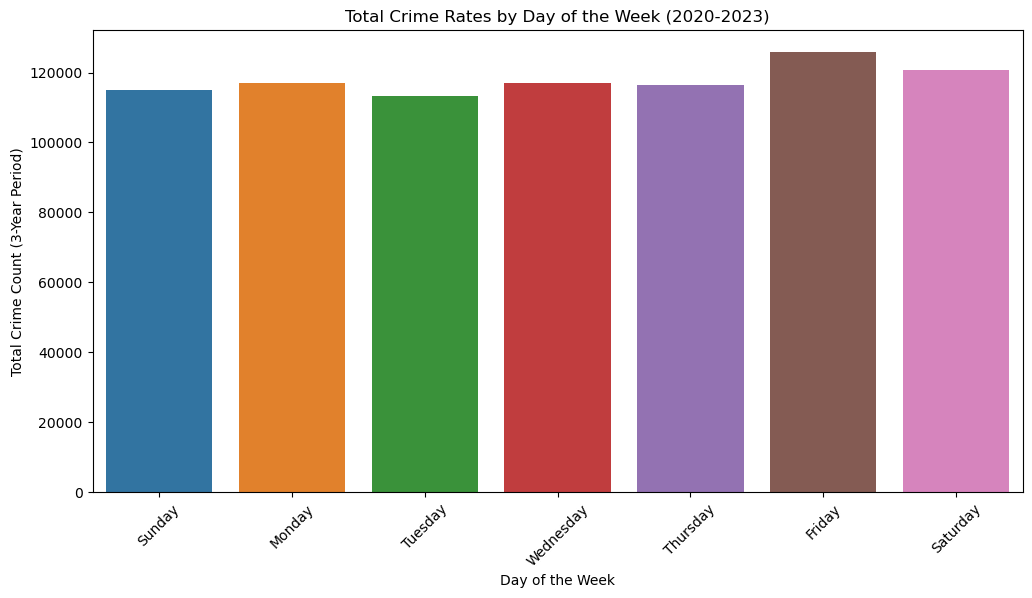

In [28]:
# Aggregate the data for the 3-year total
crime_total_by_day = crime_by_year_and_day.groupby('Day of Week')['DR_NO'].sum().reset_index()
print(crime_total_by_day)

# Create a bar plot for the total crime rates over 3 years
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='DR_NO', data=crime_total_by_day, order=day_order)
plt.title('Total Crime Rates by Day of the Week (2020-2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Crime Count (3-Year Period)')
plt.xticks(rotation=45)
plt.show()